**Маргарита Бурова**

* Преподаватель [Центра непрерывного образования](https://cs.hse.ru/dpo/) ФКН НИУ ВШЭ 
* Академический руководитель онлайн-магистратуры «[Магистр по наукам о данных](https://www.hse.ru/ma/mds/)»
* 
Старший преподаватель ФКН НИУ ВШЭ

<hr>

# День 4. Немного машинного обучения

In [1]:
import pandas as pd # импортируем библиотеку pandas

df = pd.read_csv('dates.csv') # загружаем данные из файла dates.csv и записываем в переменную df

### Описание признаков

 * gender: пол
 * age: свой возраст
 * age_o: возраст партнера  
 * field: сфера занятий
 
**Раздел про важность различных качеств (нужно распределить между 5 категориями 100 баллов)**
 * pref_o_attractive: Насколько важна привлекательность?
 * pref_o_sinsere: Насколько важна искренность?
 * pref_o_intelligence: Насколько важен интеллект? 
 * pref_o_funny: Насколько важно чувство юмора?
 * pref_o_ambitious: Насколько важна амбициозность? 
 * pref_o_shared_interests: Насколько важно разделять одинаковые интересы? 
 
**Как оценили друг друга на встрече (0-10)**
 * attractive_o: Оценка привлекательности (от партнера) в вечер встречи 
 * sincere_o: Оценка искренности (от партнера) в вечер встречи
 * intelligence_o: Оценка интеллекта (от партнера) в вечер встречи 
 * funny_o: Оценка чувства юмора (от партнера) в вечер встречи 
 * ambitous_o: Оценка амбициозности (от партнера) в вечер встречи  
 * shared_interests_o: Оценка общих интересов (от партнера) в вечер встречи  
 * attractive: Оценка собственной привлекательности
 * sincere: Оценка собственной искренности   
 * intelligence: Оценка собственного интеллекта   
 * funny: Оценка собственного чувства юмора  
 * ambition: Оценка собственных амбиций
 * attractive_partner: Оценка привлекательности партнера в вечер встречи  
 * sincere_partner: Оценка искренности партнера в вечер встречи  
 * intelligence_partner: Оценка интеллекта партнера в вечер встречи   
 * funny_partner: Оценка чувства юмора партнера в вечер встречи   
 * ambition_partner: Оценка амбициозности партнера в вечер встречи   
 * shared_interests_partner: Оценка общих интересов партнера в вечер встречи  

**Оценка своих интересов в разных сферах (0-10)**
 * sports
 * tvsports  
 * exercise  
 * dining  
 * museums  
 * art  
 * hiking  
 * gaming  
 * clubbing  
 * reading  
 * tv  
 * theater  
 * movies  
 * concerts  
 * music  
 * shopping  
 * yoga   
 
**Оценка ожиданий от быстрого свидания**
 * expected_happy_with_sd_people: Насколько вы будете удовлетворены людьми, которых встретите на спид-дэйтинге? (0-10)
 * expected_num_interested_in_me: Из 20 людей, которых вы встретите на спид-дейтинге, как вы думаете, сколько будут заинтересованы пойти с вами на настоящее свидание?
 * expected_num_matches: Сколько взаимных симпатий вы ожидаете?
 
**Результаты быстрого свидания**
 * like: Понравился ли вам партнер?  
 * met: Вы уже встречались с этим партнером?
 * decision: Ваше решение
 * decision_o: Решение вашего партнера 
 * match: Мэтч (да/нет)

In [2]:
df.head()

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
0,female,21,27,Law,35.0,20.0,20.0,20.0,0.0,5.0,...,8,1,3,2,4,7.0,0,1,0,0
1,female,21,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,...,8,1,3,2,4,7.0,1,1,0,0
2,female,21,23,Law,30.0,5.0,15.0,40.0,5.0,5.0,...,8,1,3,2,4,7.0,0,1,1,1
3,female,21,24,Law,30.0,10.0,20.0,10.0,10.0,20.0,...,8,1,3,2,4,6.0,0,1,1,1
4,female,21,25,Law,50.0,0.0,30.0,10.0,0.0,10.0,...,8,1,3,2,4,6.0,0,0,1,0


## Предскажем match!

In [3]:
from sklearn import tree #деревья решений
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #сплитование выборки

In [4]:
df.columns # посмотрим, какие колонки есть в данных

Index(['gender', 'age', 'age_o', 'field', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive', 'sincere', 'intelligence', 'funny',
       'ambition', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'expected_num_matches', 'like', 'met', 'decision', 'decision_o',
       'match'],
      dtype='object')

In [5]:
X = df.drop(['decision', 'decision_o','match'], axis = 1) # то, с помощью чего предсказываем
y = df['match'] # то, что предсказываем

In [6]:
y.value_counts()

match
0    862
1    186
Name: count, dtype: int64

## Немножечко предобработки

А какого типа наши данные?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1048 non-null   object 
 1   age                            1048 non-null   int64  
 2   age_o                          1048 non-null   int64  
 3   field                          1048 non-null   object 
 4   pref_o_attractive              1048 non-null   float64
 5   pref_o_sincere                 1048 non-null   float64
 6   pref_o_intelligence            1048 non-null   float64
 7   pref_o_funny                   1048 non-null   float64
 8   pref_o_ambitious               1048 non-null   float64
 9   pref_o_shared_interests        1048 non-null   float64
 10  attractive_o                   1048 non-null   float64
 11  sinsere_o                      1048 non-null   int64  
 12  intelligence_o                 1048 non-null   f

## Dummy - переменные

Что делать, если какие-то данные представлены в текстовом виде?

<div>
<img src="https://codecamp.ru/content/images/2021/09/oneHot1.png" width="500"/>
</div>

In [8]:
X = pd.get_dummies(X, drop_first = True) # создаем дамми-переменные

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 98 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          1048 non-null   int64  
 1   age_o                                        1048 non-null   int64  
 2   pref_o_attractive                            1048 non-null   float64
 3   pref_o_sincere                               1048 non-null   float64
 4   pref_o_intelligence                          1048 non-null   float64
 5   pref_o_funny                                 1048 non-null   float64
 6   pref_o_ambitious                             1048 non-null   float64
 7   pref_o_shared_interests                      1048 non-null   float64
 8   attractive_o                                 1048 non-null   float64
 9   sinsere_o                                    1048 non-null   int64  
 10  

### А как узнать, какое качество будет на новых данных?

<div>
<img src="https://user.oc-static.com/upload/2020/01/20/15795305751304_3c2-1.png" width="500"/>
</div>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size = 0.2) # разделяем на трейн и тест

<div>
<img src="https://user.oc-static.com/upload/2020/01/20/157953069939_3c2-2.png" width="500"/>
</div>

## Решающие деревья

<div>
<img src="https://skillbox.ru/upload/setka_images/11480520092023_278cadb5c5a600fd354bbb4a32acf34407bf98f0.png" width="500"/>
</div>

In [11]:
dt = tree.DecisionTreeClassifier(
    max_depth=5,
    random_state=42
) # задаем решающее дерево, с максимальной глубиной 7

In [12]:
dt.fit(X_train, y_train) # обучаем дерево
y_test_pred = dt.predict(X_test) # предсказывает результат на тестовых данных
print(metrics.accuracy_score(y_test, y_test_pred)) # находим точность предсказания

0.8


## KNN

Скажи мне, кто твой друг - и я скажу, кто ты!

<div>
<img src="https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png" width="500"/>
</div>

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 5 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 9)

# обучаем его по тренировочные выборке 
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test) # предсказывает результат на тестовых данных
print(metrics.accuracy_score(y_test, y_test_pred)) # находим качество предсказания

0.8380952380952381


In [14]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[171   2]
 [ 32   5]]


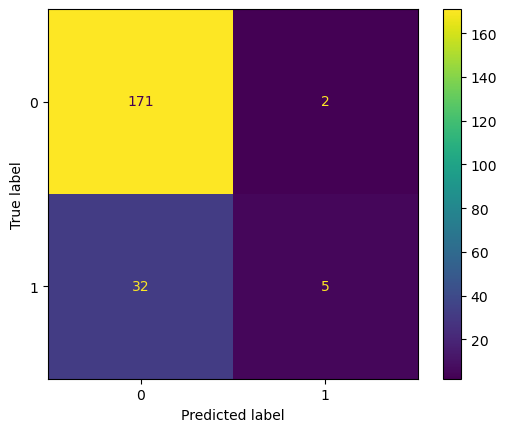

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=knn.classes_)
disp.plot()
plt.show()

Какие еще есть метрики?

<div>
<img src="https://z3.ax1x.com/2021/05/02/ge884H.png" width="500"/>
</div>

In [16]:
print(metrics.precision_score(y_test, y_test_pred)) 
print(metrics.recall_score(y_test, y_test_pred))

0.7142857142857143
0.13513513513513514


In [17]:
print(metrics.precision_score(y_test, y_test_pred, pos_label = 0)) 
print(metrics.recall_score(y_test, y_test_pred, pos_label = 0))

0.8423645320197044
0.9884393063583815
